# test - Comparison between py:_pol and diffractio polarization

Tenemos varios polarizadores y comparamos la salida en py_pol y diffractio_vector


## Load

In [1]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector

from diffractio import np, plt, sp, um, mm, degrees
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_sources_XY import Vector_source_XY

number of processors: 8
total memory        : 7.5 Gb
available memory    : 41 %
max frequency       : 4000 GHz


## definitions

In [2]:
source = Jones_vector()
pol1 = Jones_matrix('m1')
pol2 = Jones_matrix('m2')
pol3 = Jones_matrix('m3')
pol4 = Jones_matrix('m4')

In [3]:
x0=np.linspace(0,0,1)
y0=np.linspace(0,0,1)
wavelength=0.6328*um

haz_vectorial = Vector_source_XY(x0, y0, wavelength)
polarizer1 = Vector_mask_XY(x0, y0, wavelength)
polarizer2 = Vector_mask_XY(x0, y0, wavelength)
polarizer3 = Vector_mask_XY(x0, y0, wavelength)
polarizer4 = Vector_mask_XY(x0, y0, wavelength)


In [4]:
v0=[1/np.sqrt(2),1/np.sqrt(2)]

<Figure size 500x500 with 0 Axes>

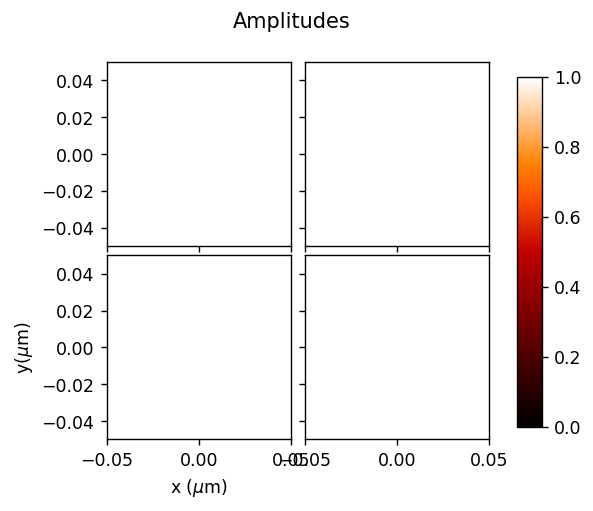

In [19]:
pol1.diattenuator_linear(p1=pol1_p[0], p2=pol1_p[1], azimuth=0* degrees)
polarizer1.from_py_pol(pol1)
polarizer1.draw()

In [26]:
Ex,Ex,Ez=haz_vectorial.get()

In [29]:
type(Ex)

numpy.ndarray

## function

In [30]:
def get_difference_pypol_diffractio(v0,pol1_p,pol2_p,pol3_p,pol4_p):
    source.from_matrix(v0);
    
    pol1.diattenuator_linear(p1=pol1_p[0], p2=pol1_p[1], azimuth=0* degrees)
    pol2.retarder_linear(R= pol2_p, azimuth=0 * degrees)
    pol3.retarder_linear(R= pol3_p, azimuth=0 * degrees)
    pol4.diattenuator_linear(p1=pol1_p[0], p2=pol1_p[1], azimuth=0 * degrees)
    
    output_py_pol=(pol4*pol3*pol2*pol1*source).M.squeeze()
    
    haz_vectorial.constant_wave(u=1,v=v0, radius=(500,500), has_normalization=False)
    polarizer1.from_py_pol(pol1)
    polarizer2.from_py_pol(pol2)
    polarizer3.from_py_pol(pol3)
    polarizer4.from_py_pol(pol4)
    
    output_diffractio=haz_vectorial*polarizer1*polarizer2*polarizer3*polarizer4
    
    Ex,Ey,Ez=output_diffractio.get()
    output_diffractio=np.array((Ex, Ey)).squeeze()
    # print(output_diffractio)
    
    difference=output_diffractio-output_py_pol
    difference=np.abs(difference).sum()
    return difference

In [31]:
for i in range(54):

    v0=[np.random.rand()+1j*np.random.rand(), np.random.rand()+1j*np.random.rand()]
    pol1_p=[np.random.rand(), np.random.rand()]
    pol2_p=np.random.rand()/degrees
    pol3_p=np.random.rand()/degrees
    pol4_p=[np.random.rand(), np.random.rand()]

    difference= get_difference_pypol_diffractio(v0,pol1_p,pol2_p,pol3_p,pol4_p)
    print("{:2.14f}  ".format(difference), sep=' ', end=' ')

0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.00000000000000   0.0000000000